In [143]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
# import tensorflow as tf

In [150]:
def read_images(path):
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96,96))
    return img.astype(float)

(96, 96)

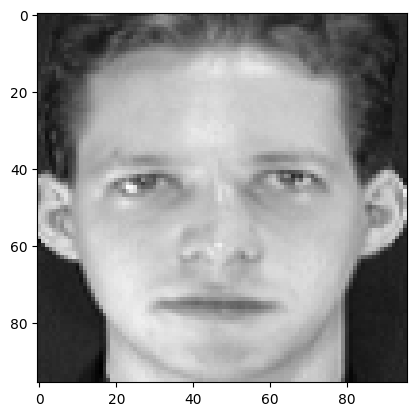

In [151]:
img = read_images('train/s1.1.tif')
plt.imshow(img, cmap='gray')
img = img.astype(float)
shape = img.shape
shape

In [152]:
image_array = []
for i in range(1,41):
    path = 'train/'+'s'+str(i)+'.1.tif'
    img = read_images(path)
    image_array.append(img.flatten())

In [153]:
image_array[0].shape

(9216,)

In [154]:
stacked_images = np.stack(image_array, axis=1)

In [155]:
stacked_images.shape

(9216, 40)

In [156]:
mean_image = np.mean(stacked_images, axis=1).reshape(-1,1)

In [157]:
mean_image.shape

(9216, 1)

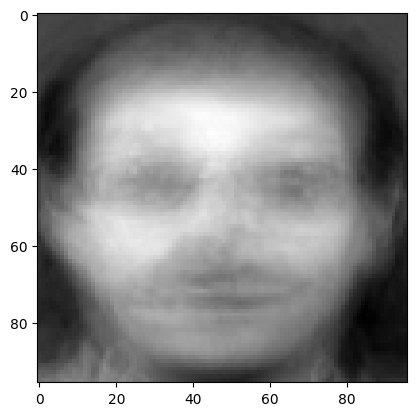

In [158]:
e = mean_image.reshape(shape)
plt.imshow(e, cmap='gray')

In [159]:
stacked_images.shape

(9216, 40)

In [160]:
centered_image = stacked_images - mean_image

In [161]:
covariance_matrix = np.cov(centered_image)


In [162]:
# torch.device('mps')
eigen_vector, eigen_values, _ = np.linalg.svd(covariance_matrix)

In [163]:
e = eigen_vector [:,30]
e.shape

(9216,)

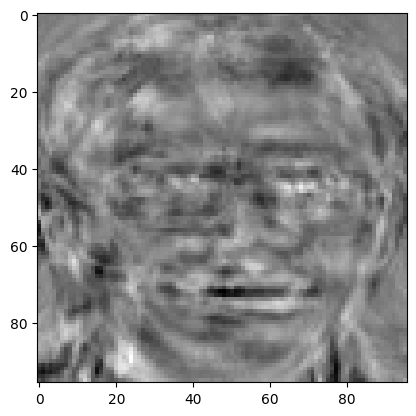

In [164]:

e = e.reshape(shape)
plt.imshow(e, cmap='gray')


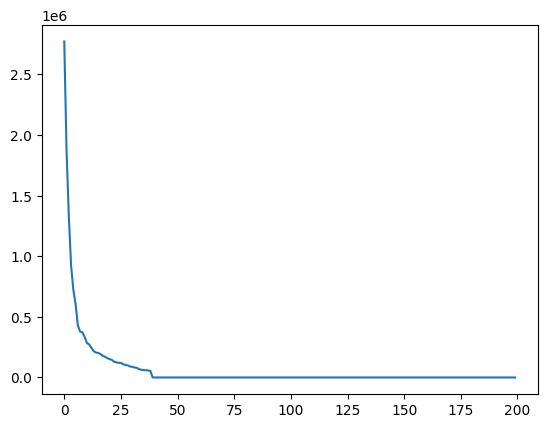

In [188]:
plt.plot(range(200),eigen_values[0:200])

In [190]:
mean_image

(9216, 1)

In [197]:
weight = np.dot( centered_image[:,0].reshape(-1,1).T, eigen_vector[:,:55])
weight.shape

(1, 55)

In [198]:
projection = np.dot(weight,eigen_vector[:,:55].T)

In [199]:
print(projection.shape)
y = mean_image[:,0].reshape(-1,1)
print(y.shape)
y = np.transpose(y)
print(y.shape)

(1, 9216)
(9216, 1)
(1, 9216)


In [200]:
img = projection + y

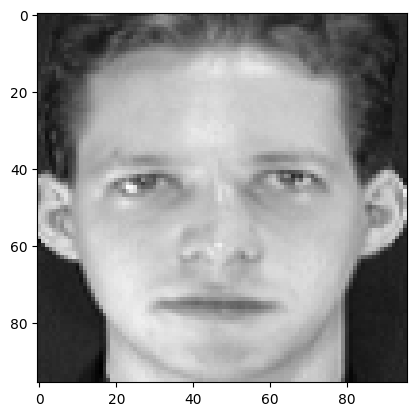

In [201]:
plt.imshow (img.reshape(shape), cmap='gray')

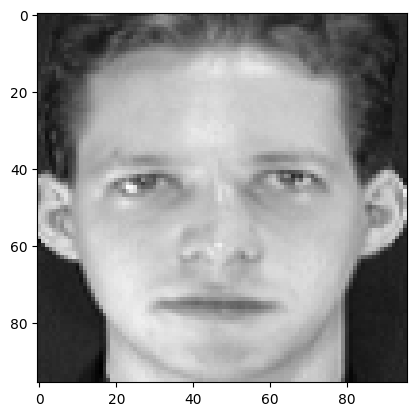

In [202]:
plt.imshow(stacked_images[:,0].reshape(shape), cmap='gray')